<a href="https://colab.research.google.com/github/Rafi653/FDA/blob/feature%2Flab1/1_Visibility_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visibility Graph Method

In [ ]:
!pip install ts2vg

     |████████████████████████████████| 1.0 MB 5.1 MB/s 


In [ ]:
!pip install igraph

     |████████████████████████████████| 3.2 MB 5.1 MB/s 


In [ ]:
!pip install pycairo
!pip install cairocffi

     |████████████████████████████████| 344 kB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
     |████████████████████████████████| 88 kB 3.8 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89667 sha256=916ab85c8fdf3efc25edd990d6c62ef04ca42a503d5e23da1c133624014d2672
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


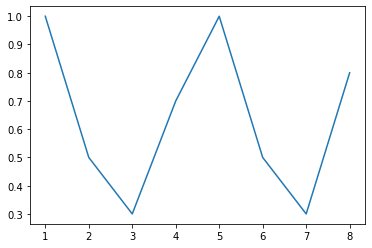

In [ ]:
import seaborn as sns
ts = [1.0, 0.5, 0.3, 0.7, 1.0, 0.5, 0.3, 0.8]
sns.lineplot(x=range(1, len(ts)+1), y=ts)

# Natural Visibility Graph
Two arbitrary data values $\left(t_{a}, y_{a}\right)$ and $\left(t_{b}, y_{b}\right)$ will have visibility, and consequently will become two connected nodes of the associated graph, if any other data $\left(t_{c}, y_{c}\right)$ placed between them fulfills:
$$
y_{c}<y_{b}+\left(y_{a}-y_{b}\right) \frac{t_{b}-t_{c}}{t_{b}-t_{a}} \text {. }
$$

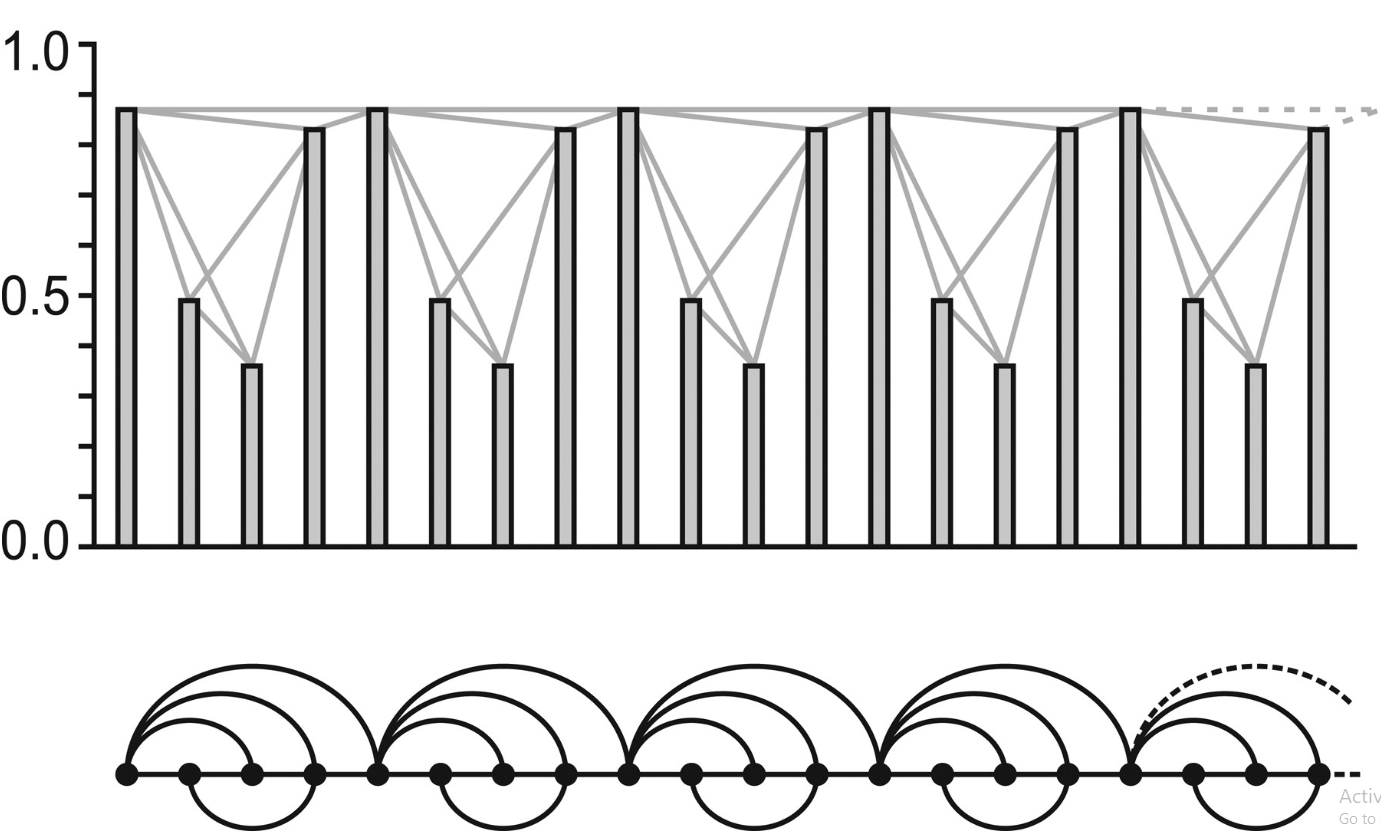

In [ ]:
from ts2vg import NaturalVG
import numpy as np
g = NaturalVG()
g.build(ts)
ig_g = g.as_igraph()

In [ ]:
print(ig_g)

IGRAPH UN-- 8 15 --
+ attr: name (v)
+ edges (vertex names):
0 -- 1, 2, 3, 4         3 -- 0, 1, 2, 4         6 -- 4, 5, 7
1 -- 0, 2, 3, 4         4 -- 0, 1, 3, 5, 6, 7   7 -- 4, 5, 6
2 -- 0, 1, 3            5 -- 4, 6, 7


In [ ]:
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())


Number of Nodes: 8
Number of Links: 15
Average Degree: 3.75
Network Diameter: 3
Average Path Length: 1.5714285714285714


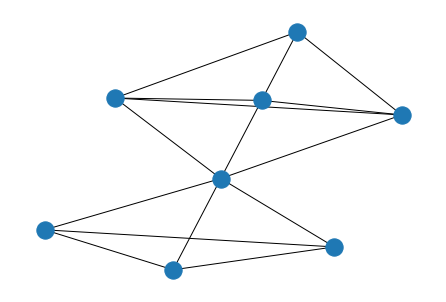

In [ ]:
nx_g = g.as_networkx()
import networkx as nx
nx.draw_kamada_kawai(nx_g)

# Horizontal Visibility Graph
The horizontal visibility algorithm maps time series into graphs and it is defined as follows. Let $\left\{x_{i}\right\}_{i=1 . . N}$ be a time series of $N$ data. The algorithm assigns each datum of the series to a node in the horizontal visibility graph (graph from now on). Two nodes $i$ and $j$ in the graph are connected if one can draw a horizontal line in the time series joining $x_{i}$ and $x_{j}$ that does not intersect any intermediate data height (see figure 2 for a graphical illustration). Hence, $i$ and $j$ are two connected nodes if the following geometrical criterion is fulfilled within the time series:
$x_{i}, x_{j}>x_{n}$ for all $n$ such that $i<n<j$ 


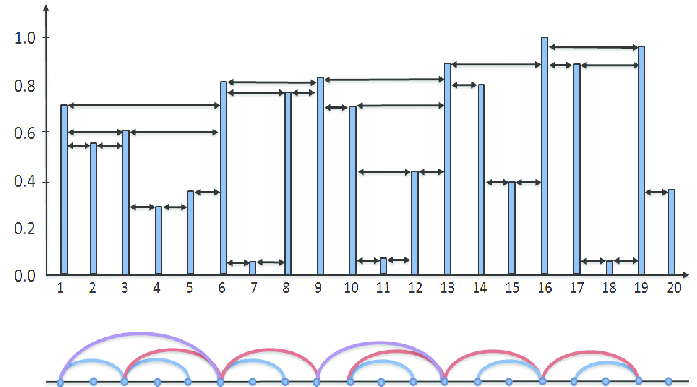

IGRAPH UN-- 8 12 --
+ attr: name (v)
+ edges (vertex names):
0 -- 1, 3, 4      3 -- 0, 1, 4, 2   5 -- 4, 7, 6      2 -- 1, 3
1 -- 0, 3, 2      4 -- 0, 3, 5, 7   7 -- 4, 5, 6      6 -- 5, 7


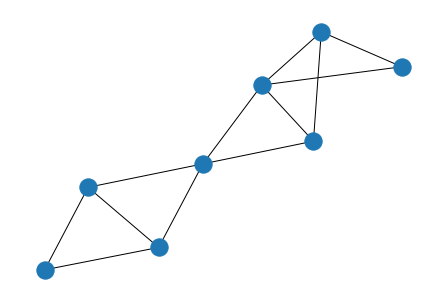

In [ ]:
from ts2vg import HorizontalVG
ts = [1.0, 0.5, 0.3, 0.7, 1.0, 0.5, 0.3, 0.8]
g = HorizontalVG()
g.build(ts)
ig_g = g.as_igraph()
print(ig_g)
nx_g = g.as_networkx()
import networkx as nx
nx.draw_kamada_kawai(nx_g)

In [ ]:
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())


Number of Nodes: 8
Number of Links: 12
Average Degree: 3.0
Network Diameter: 4
Average Path Length: 1.9285714285714286


# Real World Example

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [ ]:
import pandas as pd
hotel_df = pd.read_csv('hotel_bookings.csv')

In [ ]:
hotel_df

hotel_df1 = hotel_df[["reservation_status_date", "is_canceled"]]

In [ ]:
 hotel_df2 =  hotel_df1[hotel_df1["is_canceled"] == 1].groupby('reservation_status_date').agg({'is_canceled': 'sum'})
 display(hotel_df2)



,is_canceled
reservation_status_date,
2014-10-17,180
2014-11-18,1
2015-01-01,763
2015-01-02,16
2015-01-18,1
...,...
2017-08-26,6
2017-08-27,3
2017-08-28,3


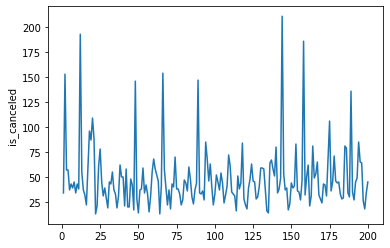

In [ ]:
sns.lineplot(x=range(1, len(hotel_df2['is_canceled'][400:600])+1), y=hotel_df2['is_canceled'][400:600])

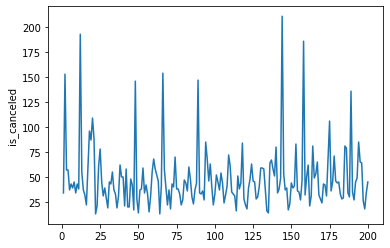

In [ ]:
sns.lineplot(x=range(1, len(hotel_df2['is_canceled'][400:600])+1), y=hotel_df2['is_canceled'][400:600])

In [ ]:
hotel_df2['is_canceled'].mean()

49.028824833702885

In [ ]:
hotel_df2[hotel_df2['is_canceled'].between(25,50)]['is_canceled']

,is_canceled
reservation_status_date,
2015-03-03,38
2015-04-28,25
2015-04-29,27
2015-05-14,50
2015-05-19,33
...,...
2017-07-13,30
2017-07-14,31
2017-07-18,32


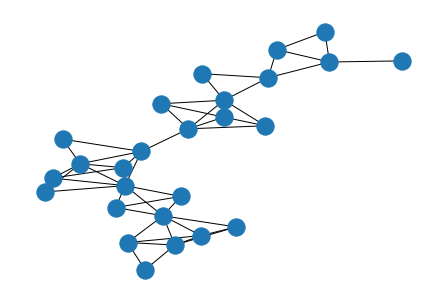

In [ ]:
from ts2vg import NaturalVG
import numpy as np
g = NaturalVG()

df = hotel_df2[hotel_df2['is_canceled'].between(49,51)]['is_canceled']


g.build(df)
ig_g = g.as_igraph()

nx_g = g.as_networkx()
import networkx as nx
nx.draw_kamada_kawai(nx_g)

In [ ]:
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 8
Number of Links: 7
Average Degree: 1.75
Network Diameter: 7
Average Path Length: 3.0


In [ ]:
from ts2vg import HorizontalVG
g = HorizontalVG()
g.build(hotel_df2['is_canceled'])
ig_g = g.as_igraph()

In [ ]:
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 902
Number of Links: 1744
Average Degree: 3.8669623059866964
Network Diameter: 28
Average Path Length: 8.962091886078785


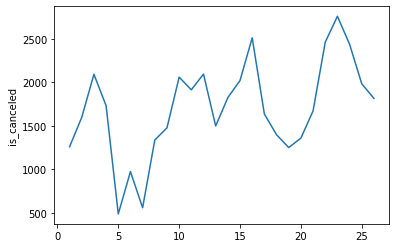

In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime

hotel_df = pd.read_csv('hotel_bookings.csv')

for i in range(len(hotel_df)):
  hotel_df.loc[i, 'arrival_date_month'] = datetime.strptime(hotel_df.loc[i, 'arrival_date_month'], "%B").month

hotel_df1 = hotel_df[["arrival_date_year", "arrival_date_month", "is_canceled"]]
hotel_df2 =  hotel_df1[hotel_df1["is_canceled"] == 1].groupby(["arrival_date_year", "arrival_date_month"]).agg({'is_canceled': 'sum'})

sns.lineplot(x=range(1, len(hotel_df2['is_canceled'])+1), y=hotel_df2['is_canceled'])

Number of Nodes: 26
Number of Links: 67
Average Degree: 5.153846153846154
Network Diameter: 5
Average Path Length: 2.3476923076923075


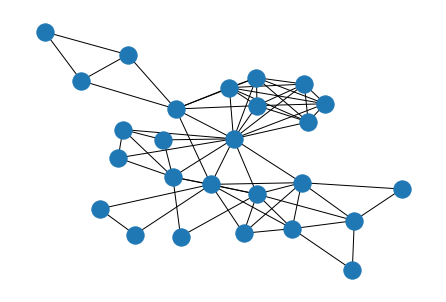

In [ ]:
from ts2vg import NaturalVG
import numpy as np
g = NaturalVG()
df = hotel_df2['is_canceled']
g.build(df)
ig_g = g.as_igraph()
nx_g = g.as_networkx()
import networkx as nx
nx.draw_kamada_kawai(nx_g)

print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 26
Number of Links: 42
Average Degree: 3.230769230769231
Network Diameter: 9
Average Path Length: 3.6123076923076924


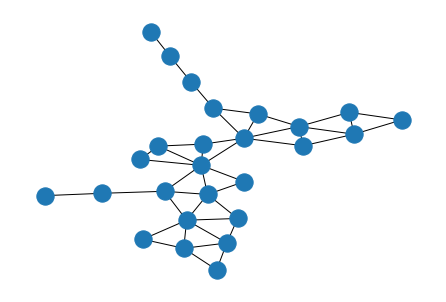

In [ ]:
from ts2vg import HorizontalVG
g = HorizontalVG()
df = hotel_df2['is_canceled']
g.build(df)
ig_g = g.as_igraph()
nx_g = g.as_networkx()
import networkx as nx
nx.draw_kamada_kawai(nx_g)

print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

In [ ]:
import pandas as pd
import seaborn as sns
from datetime import datetime

hotel_df = pd.read_csv('hotel_bookings.csv')

In [ ]:
hotel_df

for i in range(len(hotel_df)):
  hotel_df.loc[i, 'arrival_date_month'] = datetime.strptime(hotel_df.loc[i, 'arrival_date_month'], "%B").month

hotel_df1 = hotel_df[["arrival_date_year", "arrival_date_month", "is_canceled"]]
hotel_df1

,arrival_date_year,arrival_date_month,is_canceled
0,2015,7,0
1,2015,7,0
2,2015,7,0
3,2015,7,0
4,2015,7,0
...,...,...,...
119385,2017,8,0
119386,2017,8,0
119387,2017,8,0
119388,2017,8,0


In [ ]:
 hotel_df2 =  hotel_df1[hotel_df1["is_canceled"] == 1].groupby(["arrival_date_year", "arrival_date_month"]).agg({'is_canceled': 'sum'})
 display(hotel_df2)


is_canceled
arrival_date_year arrival_date_month             
2015              7                          1259
                  8                          1598
                  9                          2094
                  10                         1732
                  11                          486
                  12                          973
2016              1                           557
                  2                          1337
                  3                          1477
                  4                          2061
                  5                          1915
                  6                          2096
                  7                          1499
                  8                          1825
                  9                          2022
                  10                         2514
                  11                         1636
                  12                         1398
2017              1                          1250
                  2                          1359
                  3                          1672
                  4                          2463
                  5                          2762
                  6                          2439
                  7                          1984
                  8                          1816

In [ ]:
sns.lineplot(x=range(1, len(hotel_df2['is_canceled'])+1), y=hotel_df2['is_canceled'])

NameError: ignored

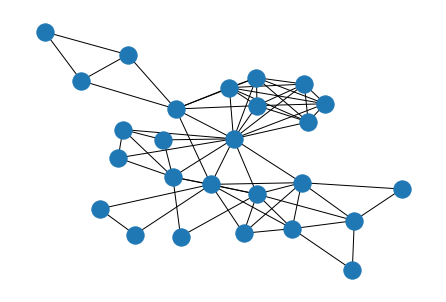

In [ ]:
from ts2vg import NaturalVG
import numpy as np
g = NaturalVG()

df = hotel_df2['is_canceled']


g.build(df)
ig_g = g.as_igraph()

nx_g = g.as_networkx()
import networkx as nx
nx.draw_kamada_kawai(nx_g)

In [ ]:
print('Number of Nodes:',ig_g.vcount())
print('Number of Links:',ig_g.ecount())
print('Average Degree:',np.mean(ig_g.degree()))
print('Network Diameter:',ig_g.diameter())
print('Average Path Length:',ig_g.average_path_length())

Number of Nodes: 26
Number of Links: 42
Average Degree: 3.230769230769231
Network Diameter: 9
Average Path Length: 3.6123076923076924


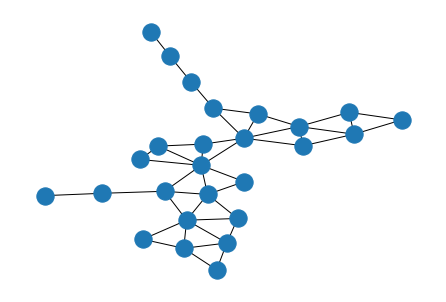

In [ ]:
from ts2vg import HorizontalVG
g = HorizontalVG()

df = hotel_df2['is_canceled']


g.build(df)
ig_g = g.as_igraph()

nx_g = g.as_networkx()
import networkx as nx
nx.draw_kamada_kawai(nx_g)